In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [91]:
df = pd.read_csv('C:\\Users\\HP\\Downloads\\___numpy-pandas-exercises.zip___1665998822272\\googleplaystore.csv')

In [92]:
df.shape

(10841, 13)

In [93]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [98]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [94]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology          

In [26]:
df.shape

(10841, 13)

###  show unique categories table

In [6]:
unique_categorties = df[['Category']].drop_duplicates()

In [7]:
unique_categorties

,Category
0,ART_AND_DESIGN
49,AUTO_AND_VEHICLES
98,BEAUTY
139,BOOKS_AND_REFERENCE
187,BUSINESS
297,COMICS
335,COMMUNICATION
476,DATING
699,EDUCATION
855,ENTERTAINMENT


###  barchart of categories vs total number of installs

In [99]:
df[['Installs']]

,Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"
...,...
10836,"5,000+"
10837,100+
10838,"1,000+"
10839,"1,000+"


In [102]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [106]:

df[(df['Installs'] == 'Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [107]:
df.loc[10472,'Installs'] = '1000+'

In [108]:
df.loc[10472,'Category'] = 'not defined'

In [109]:
df.loc[10472,'Price'] = '0'

In [110]:
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                      not defined
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                            1000+
Type                                                    0
Price                                                   0
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [111]:
df["Installs"] = df["Installs"].replace('[\+,]', '', regex = True).astype(float)

In [160]:
total = df.groupby('Category')['Installs'].sum().sort_index()

In [161]:
total.to_frame()

,Installs
Category,
ART_AND_DESIGN,1.243381e+08
AUTO_AND_VEHICLES,5.313021e+07
BEAUTY,2.719705e+07
BOOKS_AND_REFERENCE,1.921470e+09
BUSINESS,1.001915e+09
COMICS,5.608615e+07
COMMUNICATION,3.264728e+10
DATING,2.643108e+08
EDUCATION,8.714520e+08


In [162]:
total.index

Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK',
       'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER', 'not defined'],
      dtype='object', name='Category')

In [163]:
 p = total.values

array([1.24338100e+08, 5.31302110e+07, 2.71970500e+07, 1.92146958e+09,
       1.00191486e+09, 5.60861500e+07, 3.26472763e+10, 2.64310807e+08,
       8.71452000e+08, 2.86916000e+09, 1.59731610e+07, 1.02582635e+10,
       8.76648734e+08, 2.73898751e+08, 3.50860244e+10, 1.58307251e+09,
       1.68712461e+08, 6.29959100e+07, 5.37643539e+08, 7.24281890e+08,
       5.32574370e+07, 7.49631776e+09, 3.15211100e+07, 2.32549478e+09,
       1.00882477e+10, 1.41760914e+10, 3.24784878e+09, 1.40698679e+10,
       1.75117450e+09, 1.14527719e+10, 6.86888715e+09, 6.22200272e+09,
       4.26100520e+08, 1.00000000e+03])

Text(0.5, 1.0, 'installs per category')

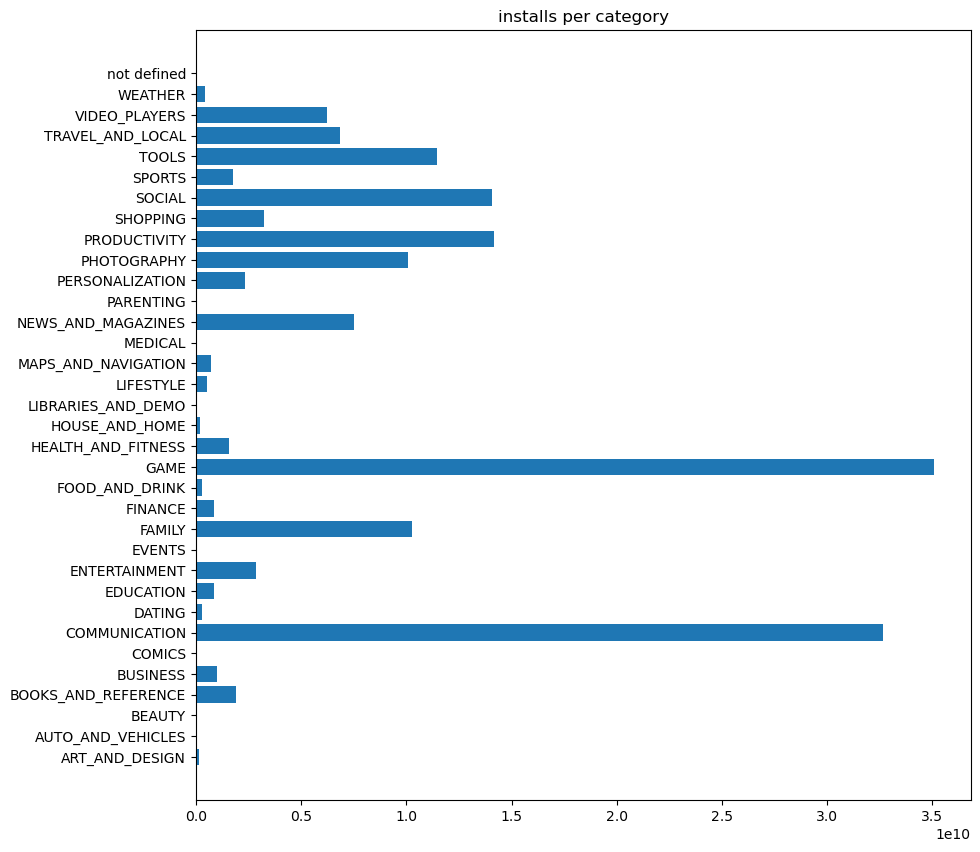

In [184]:
plt.figure(figsize=(10,10))
plt.xticks(rotation = 0)
plt.barh(total.index,total.values)
plt.title('installs per category')

###   Plot a bar chart for the total prices of each paid app in each category ( the sum of all prices in the same category)

In [165]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [89]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [118]:
df["Price"] = df["Price"].replace('[\$,]', '', regex = True).astype(float)

In [158]:
price =  df.groupby('Category')['Price'].sum().sort_index()

In [185]:
price.to_frame()

,Price
Category,
ART_AND_DESIGN,5.97
AUTO_AND_VEHICLES,13.47
BEAUTY,0.00
BOOKS_AND_REFERENCE,119.77
BUSINESS,185.27
COMICS,0.00
COMMUNICATION,83.14
DATING,31.43
EDUCATION,17.96


In [187]:
x = price.index
y = price.values 

In [188]:
y

array([5.97000e+00, 1.34700e+01, 0.00000e+00, 1.19770e+02, 1.85270e+02,
       0.00000e+00, 8.31400e+01, 3.14300e+01, 1.79600e+01, 7.98000e+00,
       1.09990e+02, 2.43478e+03, 2.90083e+03, 8.48000e+00, 2.87300e+02,
       6.73400e+01, 0.00000e+00, 9.90000e-01, 2.36087e+03, 2.69500e+01,
       1.43996e+03, 3.98000e+00, 9.58000e+00, 1.53960e+02, 1.34210e+02,
       2.50930e+02, 5.48000e+00, 1.59700e+01, 1.00000e+02, 2.67250e+02,
       4.99500e+01, 1.04600e+01, 3.24200e+01, 0.00000e+00])

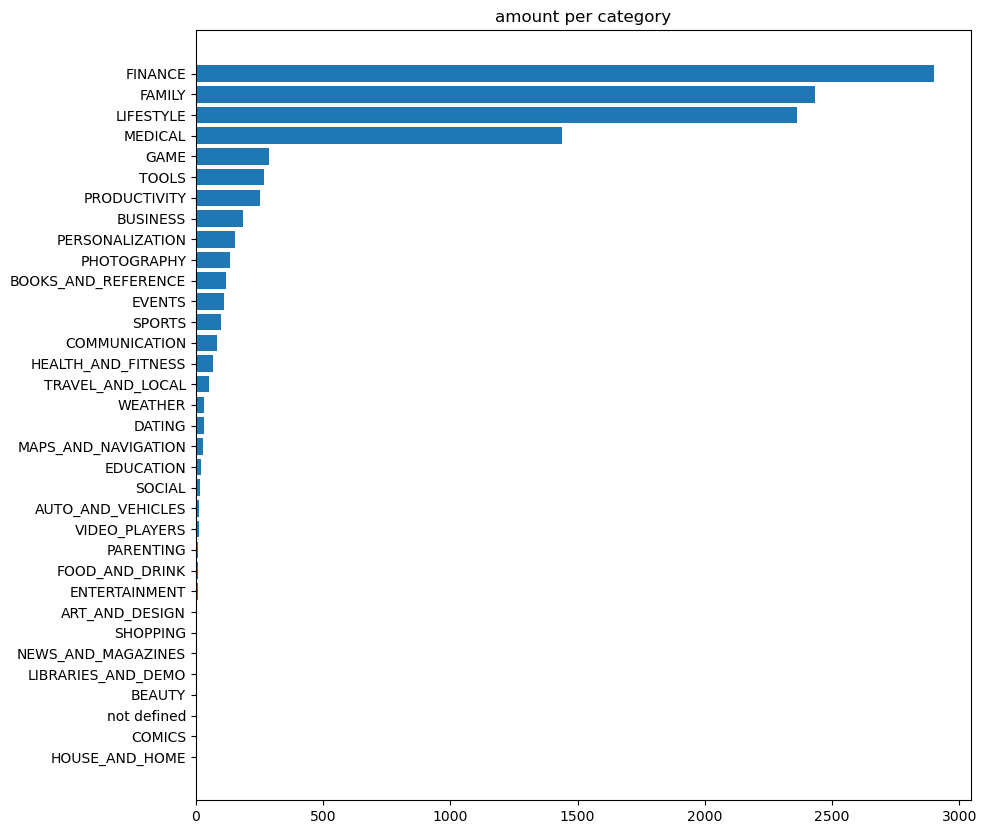

In [154]:
plt.figure(figsize=(10,10))
plt.xticks(rotation = 0)
plt.barh(x ,y )
plt.title('amount per category')
plt.show()


###  Plot a bar chart of the total profit of each category by multiplying the price by the number of installs

In [197]:
profit = pd.concat([total,price], axis=1)

In [198]:
 profit

,Installs,Price
Category,,
ART_AND_DESIGN,1.243381e+08,5.97
AUTO_AND_VEHICLES,5.313021e+07,13.47
BEAUTY,2.719705e+07,0.00
BOOKS_AND_REFERENCE,1.921470e+09,119.77
BUSINESS,1.001915e+09,185.27
COMICS,5.608615e+07,0.00
COMMUNICATION,3.264728e+10,83.14
DATING,2.643108e+08,31.43
EDUCATION,8.714520e+08,17.96


In [202]:
profit['profit'] =profit['Installs'] *profit['Price']

In [203]:
profit

,Installs,Price,profit
Category,,,
ART_AND_DESIGN,1.243381e+08,5.97,7.422985e+08
AUTO_AND_VEHICLES,5.313021e+07,13.47,7.156639e+08
BEAUTY,2.719705e+07,0.00,0.000000e+00
BOOKS_AND_REFERENCE,1.921470e+09,119.77,2.301344e+11
BUSINESS,1.001915e+09,185.27,1.856248e+11
COMICS,5.608615e+07,0.00,0.000000e+00
COMMUNICATION,3.264728e+10,83.14,2.714295e+12
DATING,2.643108e+08,31.43,8.307289e+09
EDUCATION,8.714520e+08,17.96,1.565128e+10


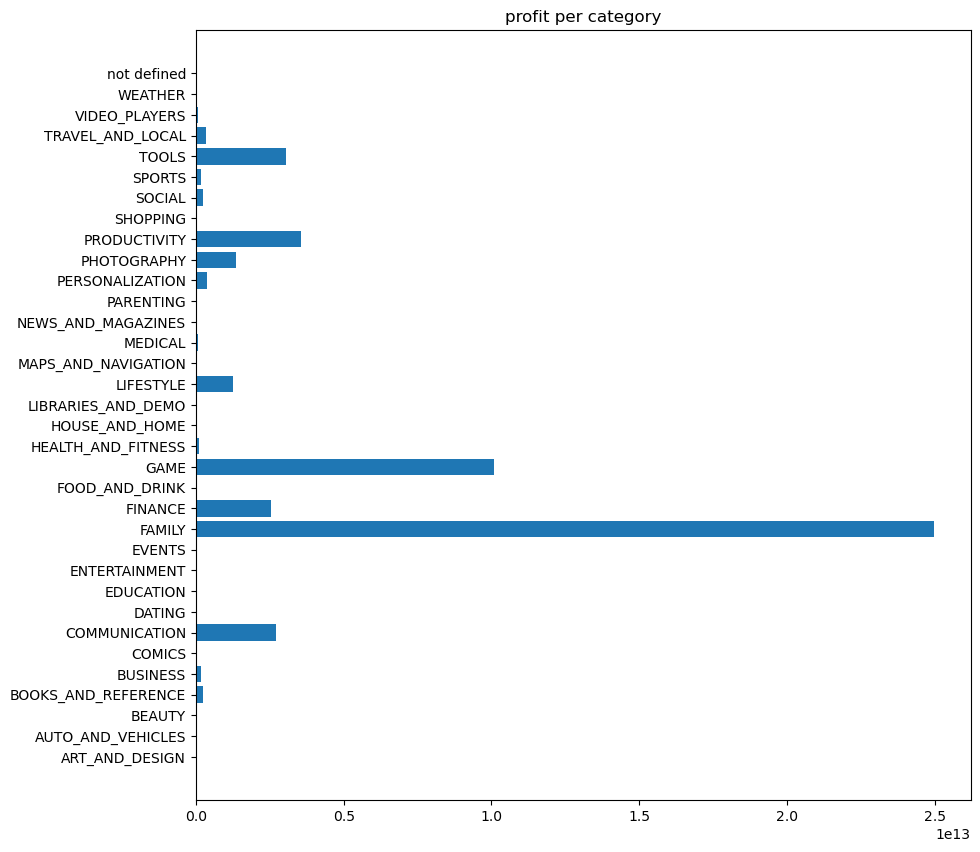

In [204]:
 plt.figure(figsize=(10,10))
plt.xticks(rotation = 0)
plt.barh(profit.index,profit['profit'] )
plt.title('profit per category')
plt.show()
